In [227]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
import nltk
import pandas as pd
import numpy as np
import re
import pprint
import os

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [228]:
r = open('stop_words.txt', mode = 'rt', encoding='utf-8')
stop_read = r.read()
stop_words=stop_read.split(' ')

stop_adj = ['좋다', '즐겁다', '없다', '있다', '어떻다', '아니다', '재미있다', '재미나다', '괜찮다', '당연하다', '많다', '가능하다', '같다', 
            '아깝다', '안되다', '부탁드리다', '그렇다', '아깝다', '좋아하다', '안되다', '전', '과', '분', '앱', '영어', '리뷰',
            '한글', '꼭', '후', '여러분', '처럼', '게임', '환불', '은', '는', '이', '가', '재밌다', '꺄', '배', '해', '하자', '추천', '용', '갑']
print(stop_words)

['굿', '게임', '은', '는', '이', '가', '~', '잼', '것', '꿀', '진짜', '할', '수', '의', '같아요', '플레이', '재미나', '!!!', '다른', '그', '아', '재미있네요', '완전', '다시', '있어요', '좋은데', '네', '해', '있는', '그냥', '이런', '갓', 'ㅋㅋ', '인', '합니다', 'game', '중', '굳', '나', '고', '못', '!!', '게', 'ㅎㅎ', '만', '하면', '^^', 'Good', '님', '재밌네요', '광고', '입니다', '잘', '한', '하는', '저', '근데', '그리고', '해주세요', '개', '와', '으로', '짱', '업데이트', '거', '안', '에서', 'ㅋ', 'ㅠㅠ', '너무', '좋아요', '도', '을', '.', '에', '요', '제', '가', '재밌어요', '!', '정말', '...', '..', '넘', '?', '하고', '때', '재미있어요', '를', '들', '많이', '최고', '좀', '재미', '다', '더', '로', '내', '이', '있', '하', '것', '들', '그', '되', '수', '이', '보', '않', '없', '나', '사람', '주', '아니', '등', '같', '우리', '때', '년', '한', '가', '지', '대하', '오', '말', '일', '그렇', '위하', '때문', '그것', '두', '말하', '알', '받', '못하', '일', '그런', '또', '문제', '더', '사회', '많', '그리고', '좋', '크', '따르', '중', '나오', '가지', '씨', '시키', '만들', '지금', '생각하', '그러', '속', '하나', '살', '모르', '적', '월', '데', '자신', '안', '어떤', '내', '경우', '명', '생각', '그녀', '다시', '이런', '앞', '보이', '번', '나', '다른', '어떻',

In [229]:
df = pd.read_csv('all_reviews.csv', error_bad_lines=False)

df.replace(np.nan, '', regex=True)    #nan replace
df.head(20)

,Unnamed: 0,name,review
0,0.0,60 Seconds! Atomic Adventure,한글 옵션 가서 변경하면 잘 번역되어있고 영상 보기만 하고 폰으로 시작해서 조작감...
1,1.0,60 Seconds! Atomic Adventure,언어는 본인이 알아서 옵션 들어가서 바꿔야지 그게 기본 중에 기본이잖아요 그런 것...
2,2.0,60 Seconds! Atomic Adventure,조작감 구린 거 빼고는 다 만족합니다. 그리고 한국어 안된다 하시는 분들 그 옵션...
3,3.0,60 Seconds! Atomic Adventure,제가 꼭 해보고 싶었던 게임인데 이렇게 할 수 있어서 좋네요!! 좀 비싸서 고민하...
4,4.0,60 Seconds! Atomic Adventure,저는 이 게임이 꿀 잼입니다만 총이나 기타 같은 걸로 밖에 탐사하러나가서 몬스터나...
5,5.0,60 Seconds! Atomic Adventure,한국어 안된다는 분들 설정 가서 찾고 말하세요ᄒᄒᄒᄒ 설마 못 찾는 호구 없제?ㅋ...
6,6.0,60 Seconds! Atomic Adventure,님들이 한국어 못 바꾸는 건 대 왜 풀 발함 내가 영어는 못 읽어도 그 정도는 바...
7,7.0,60 Seconds! Atomic Adventure,꿀잼ㅠㅠㅠㅠㅠ다만 한글 번역이 완벽하지 못한지 가끔 스크립트가 중국어로 나오는게있...
8,8.0,60 Seconds! Atomic Adventure,와 지금까지 해본 게임 중에서 최고다.....ㄷㄷ
9,9.0,60 Seconds! Atomic Adventure,한글 찾으시는 분들은 옵션 → 랭귀지에 보면 잉글리시라고 되어있는데 화살표 오지게...


In [193]:
#df[['Unnamed: 0' , 'name']]

In [230]:
dflist = df[df['Unnamed: 0']<10]

In [231]:
ind_list = dflist.index.tolist()
name_ind_list = dflist.name.tolist()
review_list = dflist.review.tolist()

In [232]:
data = df.review.values.tolist()
print(len(data))

36356


In [233]:
from konlpy.tag import Twitter; t = Twitter()

tokens_ko = []
for word in data:
    tmp_list = t.morphs(str(word))
    tokens_ko.append(tmp_list)
    
result = []
tmp = []

for word in tokens_ko: 
    tmp = []
    for w in word:
        if w not in stop_words: 
            tmp.append(w)
    
    result.append(tmp)
        
print(len(result))     #195671
print(len(tokens_ko))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/konlpy/tag/_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


36356
36356


In [242]:
print(result[:10])

[['한글', '옵션', '가서', '변경', '번역', '되어있고', '영상', '보기', '시작', '조작', '감', '힘들지만', '적응하면', '될', '같고', '자주', '아닌데', '할인', '했을', '구매', '과자', '봉지', '값', '싸게', '삼', '2~3', '질릴', '있으나', '심심할', '하기', '좋음', '할인', '노려', '구매', '좋을'], ['언어', '본인', '알아서', '옵션', '들어가서', '바꿔야지', '그게', '기본', '기본', '잖아요', '하지', '마세요', '본인', '무식한', '자랑', '싶은', '건가', '조작', '감은', '이해', '하지만', '언어', '바꿔서', '주는', '노', '언어', '영어', '뭔', '모르는', '건가', '아무리', '영', '이어도', '기초', '대부분', '텐데', '비정상', '인들'], ['조작', '감', '구린', '빼고는', '만족합니다', '한국어', '안된다', '하시는', '분들', '옵션', '같은', '찾아보시고', '영어', '한국어', '바꾸세요', '찾아보면', '금방', '나옵니다'], ['꼭', '해보고', '싶었던', '이렇게', '있어서', '비싸서', '고민', '있었는데', '할인', '돼서', '사', '봤는데'], ['입니다만', '총', '이나', '기타', '같은', '걸', '밖에', '탐사', '하러', '나가서', '몬스터', '군', '인들', '공격', '있었으면', '좋을'], ['한국어', '안된다는', '분들', '설정', '가서', '찾고', '하세요', 'ᄒᄒᄒᄒ', '설마', '찾는', '호구', '난', '바로', '찾아서', '즐겜', 'ㅎ'], ['님들', '한국어', '바꾸는', '대', '풀', '발함', '영어', '읽어도', '바꾼다', '개발자', '욕', '하지', '말고', '너', '부터', '봐라'], ['꿀잼', 'ㅠㅠㅠㅠㅠ', '다만', '한글', '번

In [280]:
#ko = nltk.Text(result, name='tokens_ko')  
ko_list = []
for nltk_word in tokens_ko:
    ko = nltk.Text(nltk_word, name = 'tmp')
    ko_list.append(ko)
    
print(len(ko_list))
#print(len(set(ko.tokens))) # returns number of unique tokensb

36356


In [281]:
from konlpy.tag import Twitter; t = Twitter()

texts_ko_list = []

for ko in ko_list:   #ko_list
    pos = lambda d: ['/'.join(p) for p in t.pos(d, stem=True, norm=True)]
    texts_ko = [pos(doc) for doc in ko]
    #for doc in ko:
     #   texts_ko = t.pos(doc, stem = True, norm = True)
    texts_ko_list.append(texts_ko)

print(len(texts_ko_list))

36356


In [247]:
ko_list[:10]

[<Text: tmp>,
 <Text: tmp>,
 <Text: tmp>,
 <Text: tmp>,
 <Text: tmp>,
 <Text: tmp>,
 <Text: tmp>,
 <Text: tmp>,
 <Text: tmp>,
 <Text: tmp>]

In [249]:
print(texts_ko_list[0])

[['한글/Noun'], ['옵션/Noun'], ['가다/Verb'], ['변경/Noun'], ['번역/Noun'], ['되어다/Verb'], ['영상/Noun'], ['보기/Noun'], ['시작/Noun'], ['조작/Noun'], ['감/Noun'], ['힘들다/Adjective'], ['적응하다/Adjective'], ['되다/Verb'], ['같다/Adjective'], ['자주/Noun'], ['아니다/Adjective'], ['할인/Noun'], ['하다/Verb'], ['구매/Noun'], ['과자/Noun'], ['봉지/Noun'], ['값/Noun'], ['싸다/Verb'], ['삼/Noun'], ['2~3/Number'], ['질리다/Verb'], ['있다/Adjective'], ['심심하다/Adjective'], ['하다/Verb'], ['좋다/Adjective'], ['할인/Noun'], ['노리다/Verb'], ['구매/Noun'], ['좋다/Adjective']]


In [250]:
input_list = [('불용어', 'Stopword')]

In [209]:
input_list = []
for name in name_ind_list:
    input_list.append('(\'' + name + '\', \'title\')')

In [210]:
print(input_list[0])

('60 Seconds! Atomic Adventure', 'title')


In [277]:
noun_adj_list = []
texts_ko_list_cp = texts_ko_list

for texts_ko in texts_ko_list_cp:
    tmp_list = []
    for word in texts_ko:
        try:
            #print(str(word).split('/')[1].split('\'')[0])
            _ = str(word).split('/')[1].split('\'')[0]
            if _ == 'Adjective' or _ == 'Noun' or _ == 'Verb':    #형용사, 명사
                tmp_list.append(word)
        except:
            print(word)
    
    noun_adj_list.append(tmp_list)

print((noun_adj_list[0]))

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[['한글/Noun'], ['옵션/Noun'], ['가다/Verb'], ['변경/Noun'], ['번역/Noun'], ['되어다/Verb'], ['영상/Noun'], ['보기/Noun'], ['시작/Noun'], ['조작/Noun'], ['감/Noun'], ['힘들다/Adjective'], ['적응하다/Adjective'], ['되다/Verb'], ['같다/Adjective'], ['자주/Noun'], ['아니다/Adjective'], ['할인/Noun'], ['하다/Verb'], ['구매/Noun'], ['과자/Noun'], ['봉지/Noun'], ['값/Noun'], ['싸다/Verb'], ['삼/Noun'], ['질리다/Verb'], ['있다/Adjective'], ['심심하다/Adjective'], ['하다/Verb'], ['좋다/Adjective'], ['할인/Noun'], ['노리다/Verb'], ['구매/Noun'], ['좋다/Adjective']]


In [278]:
texts_ko_list_except = []

for ele in noun_adj_list:
    if str(ele).split('\'')[1] not in stop_adj:
            texts_ko_list_except.append(ele)
    else:
        texts_ko_list_except.append(input_list[0])
    
    '''
    for ele_word in ele:        
        print(ele_word)
        if str(ele_word).split('\'')[1] not in stop_adj:
            texts_ko_list_except.append(ele_word)
        else:
            texts_ko_list_except.append(input_list[0])
            '''
    

IndexError: list index out of range

In [215]:
print((texts_ko_list_except))

["('60 Seconds! Atomic Adventure', 'title')", "('60 Seconds! Atomic Adventure', 'title')", "('60 Seconds! Atomic Adventure', 'title')", "('60 Seconds! Atomic Adventure', 'title')", "('60 Seconds! Atomic Adventure', 'title')", "('60 Seconds! Atomic Adventure', 'title')", "('60 Seconds! Atomic Adventure', 'title')", "('60 Seconds! Atomic Adventure', 'title')", "('60 Seconds! Atomic Adventure', 'title')", "('60 Seconds! Atomic Adventure', 'title')", "('60 Seconds! Atomic Adventure', 'title')", "('60 Seconds! Atomic Adventure', 'title')", "('60 Seconds! Atomic Adventure', 'title')", "('60 Seconds! Atomic Adventure', 'title')", "('60 Seconds! Atomic Adventure', 'title')", "('60 Seconds! Atomic Adventure', 'title')", "('60 Seconds! Atomic Adventure', 'title')", "('60 Seconds! Atomic Adventure', 'title')", "('60 Seconds! Atomic Adventure', 'title')", "('60 Seconds! Atomic Adventure', 'title')", "('60 Seconds! Atomic Adventure', 'title')", "('60 Seconds! Atomic Adventure', 'title')", "('60 Sec

In [279]:
#create id2word
from gensim import corpora
dictionary_ko = corpora.Dictionary(texts_ko_list_except)

TypeError: decoding to str: need a bytes-like object, list found

In [90]:
# assume the word 'b' is to be deleted, put its id in a variable
del_ids = [k for k,v in dictionary_ko.items() if v == 'Stopword' or v == 'Noun' or v == 'Adjective']

# remove unwanted word ids from the dictionary in place
dictionary_ko.filter_tokens(bad_ids=del_ids)

In [283]:
from gensim import models
tf_ko = [dictionary_ko.doc2bow(text) for text in result]
#tf_ko = [dictionary_ko.doc2bow(text) for text in texts_ko_list_except]
tfidf_model_ko = models.TfidfModel(tf_ko)
tfidf_ko = tfidf_model_ko[tf_ko]
#corpora.MmCorpus.serialize('ko.mm', tfidf_ko) # save corpus to file for future use

In [284]:
print(tf_ko)

[[(49, 1), (114, 1), (402, 1), (445, 2), (631, 1), (694, 1), (730, 1), (1231, 1), (1462, 1), (1467, 1), (1595, 2), (1856, 1), (2261, 1)], [(192, 2), (264, 1), (965, 1), (1462, 1), (2261, 1)], [(38, 2), (631, 1), (1462, 1), (2261, 1)], [(220, 1), (1595, 1)], [(101, 1), (450, 1), (466, 1), (2241, 1)], [(38, 1), (307, 1), (443, 1), (1369, 1), (2457, 1)], [(21, 1), (38, 1), (521, 1), (566, 1), (698, 1), (1341, 1), (1775, 1)], [(49, 1), (74, 1), (524, 1)], [(155, 1)], [(38, 1), (736, 1), (1421, 1), (2261, 1), (2457, 1)], [(21, 1), (40, 1), (201, 1), (432, 1), (562, 1), (933, 1), (2456, 1)], [(1595, 1)], [(38, 1), (133, 1)], [(48, 1), (857, 1), (936, 1), (1462, 1)], [(38, 1), (546, 1), (2109, 1), (2457, 1)], [(38, 2), (264, 1), (1876, 1)], [(966, 1), (1333, 1), (1595, 1), (2494, 1)], [(1462, 1)], [], [(3, 1), (38, 1), (1908, 1)], [(1462, 1)], [], [(1462, 1)], [(583, 1), (2527, 1)], [(199, 1), (594, 1)], [(3, 1), (1564, 1), (2457, 1)], [], [(4, 1)], [], [(1895, 1)], [(5, 1), (2109, 1)], [], [

In [107]:
import numpy as np; np.random.seed(42)  # optional
import pprint

ntopics = 7
nwords = 7

lda_ko = models.ldamodel.LdaModel(tfidf_ko, id2word=dictionary_ko, num_topics=ntopics)
pprint.pprint(lda_ko.print_topics(num_topics=ntopics, num_words=nwords))

from gensim.models import word2vec

wv_model_ko = word2vec.Word2Vec(texts_ko_list_except)
wv_model_ko.init_sims(replace=True)
#wv_model_ko.save('ko_word2vec.model')


[(0,
  '0.059*"최고다" + 0.033*"중독" + 0.021*"아유" + 0.020*"최애" + 0.017*"비싸다" + '
  '0.017*"Verb" + 0.015*"멋지다"'),
 (1,
  '0.076*"어렵다" + 0.036*"여" + 0.034*"즐거움" + 0.025*"만해" + 0.023*"풀이" + '
  '0.019*"아쉽다" + 0.018*"잼임"'),
 (2,
  '0.331*"귀엽다" + 0.048*"와우" + 0.043*"대박" + 0.038*"온" + 0.028*"힘들다" + '
  '0.026*"별로" + 0.020*"감사"'),
 (3,
  '0.097*"개꿀" + 0.093*"성" + 0.051*"겜" + 0.037*"밉다" + 0.023*"꿀젬" + 0.022*"완벽하다" '
  '+ 0.019*"지네"'),
 (4,
  '0.976*"불용어" + 0.003*"강추" + 0.001*"딱이다" + 0.001*"하니" + 0.001*"왕" + '
  '0.000*"친구" + 0.000*"난"'),
 (5,
  '0.047*"고양이" + 0.047*"굿굿굿" + 0.040*"예쁘다" + 0.039*"심심하다" + 0.038*"킬링타임" + '
  '0.034*"잡" + 0.033*"핵꿀잼"'),
 (6,
  '0.109*"남" + 0.084*"사랑" + 0.030*"쉽다" + 0.029*"기분" + 0.026*"만족" + 0.020*"파이팅" '
  '+ 0.020*"고맙다"')]


In [199]:
import gensim

lda_model = gensim.models.ldamodel.LdaModel(corpus=tf_ko,
id2word=dictionary_ko,
num_topics=7,
random_state=100,
update_every=1,
chunksize=100,
passes=10,
alpha='auto',
per_word_topics=True)

doc_lda = lda_model[tf_ko]
import pprint

pprint.pprint(lda_model.print_topics())


[(0,
  '0.546*"귀엽다" + 0.048*"여" + 0.042*"풀이" + 0.038*"꾸르잼" + 0.029*"중독" + '
  '0.014*"비싸다" + 0.013*"가장" + 0.012*"귀찮다" + 0.012*"건가" + 0.011*"음"'),
 (1,
  '0.888*"불용어" + 0.004*"고양이" + 0.003*"핵꿀잼" + 0.002*"별로" + 0.002*"기분" + '
  '0.002*"지네" + 0.002*"꿀젬" + 0.002*"모름" + 0.002*"신나다" + 0.001*"핵잼"'),
 (2,
  '0.119*"굿굿굿" + 0.074*"힘들다" + 0.073*"쉽다" + 0.063*"밉다" + 0.046*"졸잼" + '
  '0.043*"부탁" + 0.035*"딱이다" + 0.034*"죔죔" + 0.032*"하니" + 0.030*"이상"'),
 (3,
  '0.234*"성" + 0.106*"잡" + 0.051*"감" + 0.039*"드" + 0.025*"안녕하다" + 0.019*"아프다" '
  '+ 0.010*"처음" + 0.010*"최" + 0.008*"자" + 0.007*"자주"'),
 (4,
  '0.063*"사랑" + 0.044*"킬링타임" + 0.041*"어렵다" + 0.028*"예쁘다" + 0.028*"즐거움" + '
  '0.026*"최애" + 0.024*"가요" + 0.018*"개꿀" + 0.018*"간단하다" + 0.015*"아유"'),
 (5,
  '0.333*"남" + 0.076*"대박" + 0.062*"만족" + 0.042*"강추" + 0.032*"아쉽다" + '
  '0.023*"강하다" + 0.022*"꿀잼" + 0.018*"만족하다" + 0.018*"존잼" + 0.013*"잼슴"'),
 (6,
  '0.102*"최고다" + 0.102*"심심하다" + 0.087*"와우" + 0.083*"짐" + 0.048*"Verb" + '
  '0.034*"완벽하다" + 0.033*"제일" + 0.030*"모르다

In [94]:
print(doc_lda[0])

([(1, 0.012714787), (2, 0.83538866), (3, 0.1066655), (4, 0.012593092), (5, 0.013162941), (6, 0.010489775)], [(0, [2])], [(0, [(2, 1.0)])])


In [102]:
[x[1] for x in lda_model[tf_ko][200][0]]

[0.012714787, 0.83538866, 0.1066655, 0.012593092, 0.013162941, 0.010489775]

In [146]:
vec_list = []

for i in range(len(tf_ko)):
    vec_list.append([x[1] for x in lda_model[tf_ko][i][0]])

In [151]:
print(len(name_ind_list))
print(len(vec_list))

1018
36356


In [148]:
for i in range(len(vec_list)):
    if len(vec_list[i]) > 6:
        vec_list[i] = (vec_list[i][1:])

In [161]:
for i in range(len(vec_list)):
    if len(vec_list[i]) != 6:
        print(vec_list[i])
       # vec_list[i].append(0.000)

In [152]:
df= []
for i in range(len(name_ind_list)):
    df.append([ind_list[i], name_ind_list[i], review_list[i], vec_list[i]])

In [153]:
data_df = pd.DataFrame(df, columns=['ind', 'name', 'review', 'lda'])

In [154]:
data_df.head()

,ind,name,review,lda
0,0,60 Seconds! Atomic Adventure,한글 옵션 가서 변경하면 잘 번역되어있고 영상 보기만 하고 폰으로 시작해서 조작감...,"[0.012714787, 0.83538866, 0.1066655, 0.0125930..."
1,1,60 Seconds! Atomic Adventure,언어는 본인이 알아서 옵션 들어가서 바꿔야지 그게 기본 중에 기본이잖아요 그런 것...,"[0.012714787, 0.83538866, 0.1066655, 0.0125930..."
2,2,60 Seconds! Atomic Adventure,조작감 구린 거 빼고는 다 만족합니다. 그리고 한국어 안된다 하시는 분들 그 옵션...,"[0.012714787, 0.83538866, 0.1066655, 0.0125930..."
3,3,60 Seconds! Atomic Adventure,제가 꼭 해보고 싶었던 게임인데 이렇게 할 수 있어서 좋네요!! 좀 비싸서 고민하...,"[0.012714787, 0.83538866, 0.1066655, 0.0125930..."
4,4,60 Seconds! Atomic Adventure,저는 이 게임이 꿀 잼입니다만 총이나 기타 같은 걸로 밖에 탐사하러나가서 몬스터나...,"[0.012714787, 0.83538866, 0.1066655, 0.0125930..."


In [163]:
data_arr = np.expand_dims(data_df['lda'][0], 0)

In [164]:
for data in data_df['lda'][0:]: 
   # np.concatenate((data_arr,np.expand_dims(data, 0)[:,None]),axis=1)
    data_arr = np.vstack([data_arr, np.expand_dims(data, 0)])

In [188]:
data_arr.shape

(1019, 6)

In [189]:
# 코사인 유사도

from sklearn.metrics.pairwise import cosine_similarity

cs = cosine_similarity(data_arr, data_arr)

for i in range(len(cs[0])):
    game_idx = i//10
    cs[i][(10*game_idx):(10*(game_idx+1))] = 0

In [190]:
print(len(cs))

1019


In [167]:
cs

array([[0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        0.99262227],
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        0.99262227],
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        0.99262227],
       ...,
       [1.        , 1.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 1.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.99262227, 0.99262227, 0.99262227, ..., 0.        , 0.        ,
        0.        ]])

In [191]:
rec_game = []
arg = []
for i in range(len(cs[0])):
    game_idx = np.argmax(cs[i])//10
    rec_game1 = name_ind_list[game_idx]
    cs[i][np.argmax(cs[i])] = 0
    
    game_idx = np.argmax(cs[i])//10
    rec_game2 = name_ind_list[game_idx]
    
    rec_game.append((rec_game1, rec_game2))

In [192]:
print(len((rec_game)))

1019


In [193]:
# 유클리드 거리

from scipy.spatial import distance
dst = np.zeros([1019,1019])

for i in range(1019):
    for j in range(1019):
        _dst = np.sqrt(np.sum(np.square(data_arr[i] - data_arr[j])))
        _dst /= (np.sqrt(np.sum(np.square(data_arr[i]))) + np.sqrt(np.sum(np.square(data_arr[j]))))
        dst[i,j] = _dst
dst

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.07345401],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.07345401],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.07345401],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.07345401],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.07345401],
       [0.07345401, 0.07345401, 0.07345401, ..., 0.07345401, 0.07345401,
        0.        ]])

In [194]:
for i in range(1019):
    game_idx = i//10
    dst[i][(10*game_idx):(10*(game_idx+1))] = 100

In [196]:
rec_game = []

for i in range(1019):
    game_idx = np.argmin(dst[i])//10
    rec_game1 = name_ind_list[game_idx]
    dst[i][np.argmin(dst[i])] = 100
    
    game_idx = np.argmin(dst[i])//10
    rec_game2 = name_ind_list[game_idx]
    
    rec_game.append((rec_game1, rec_game2))
    
    
len(rec_game)

1019

In [197]:
rec_game_df = [[x[1:]] for x in rec_game]
rec_game_df = pd.DataFrame(rec_game_df, columns=['lda-result'])
rec_game_df.head()

,lda-result
0,"(60 Seconds! Atomic Adventure,)"
1,"(60 Seconds! Atomic Adventure,)"
2,"(60 Seconds! Atomic Adventure,)"
3,"(60 Seconds! Atomic Adventure,)"
4,"(60 Seconds! Atomic Adventure,)"


In [198]:
result_df = pd.concat([data_df, rec_game_df], axis=1)
result_df

,ind,name,review,lda,lda-result
0,0.0,60 Seconds! Atomic Adventure,한글 옵션 가서 변경하면 잘 번역되어있고 영상 보기만 하고 폰으로 시작해서 조작감...,"[0.012714787, 0.83538866, 0.1066655, 0.0125930...","(60 Seconds! Atomic Adventure,)"
1,1.0,60 Seconds! Atomic Adventure,언어는 본인이 알아서 옵션 들어가서 바꿔야지 그게 기본 중에 기본이잖아요 그런 것...,"[0.012714787, 0.83538866, 0.1066655, 0.0125930...","(60 Seconds! Atomic Adventure,)"
2,2.0,60 Seconds! Atomic Adventure,조작감 구린 거 빼고는 다 만족합니다. 그리고 한국어 안된다 하시는 분들 그 옵션...,"[0.012714787, 0.83538866, 0.1066655, 0.0125930...","(60 Seconds! Atomic Adventure,)"
3,3.0,60 Seconds! Atomic Adventure,제가 꼭 해보고 싶었던 게임인데 이렇게 할 수 있어서 좋네요!! 좀 비싸서 고민하...,"[0.012714787, 0.83538866, 0.1066655, 0.0125930...","(60 Seconds! Atomic Adventure,)"
4,4.0,60 Seconds! Atomic Adventure,저는 이 게임이 꿀 잼입니다만 총이나 기타 같은 걸로 밖에 탐사하러나가서 몬스터나...,"[0.012714787, 0.83538866, 0.1066655, 0.0125930...","(60 Seconds! Atomic Adventure,)"
5,5.0,60 Seconds! Atomic Adventure,한국어 안된다는 분들 설정 가서 찾고 말하세요ᄒᄒᄒᄒ 설마 못 찾는 호구 없제?ㅋ...,"[0.012714787, 0.83538866, 0.1066655, 0.0125930...","(60 Seconds! Atomic Adventure,)"
6,6.0,60 Seconds! Atomic Adventure,님들이 한국어 못 바꾸는 건 대 왜 풀 발함 내가 영어는 못 읽어도 그 정도는 바...,"[0.012714787, 0.83538866, 0.1066655, 0.0125930...","(60 Seconds! Atomic Adventure,)"
7,7.0,60 Seconds! Atomic Adventure,꿀잼ㅠㅠㅠㅠㅠ다만 한글 번역이 완벽하지 못한지 가끔 스크립트가 중국어로 나오는게있...,"[0.012714787, 0.83538866, 0.1066655, 0.0125930...","(60 Seconds! Atomic Adventure,)"
8,8.0,60 Seconds! Atomic Adventure,와 지금까지 해본 게임 중에서 최고다.....ㄷㄷ,"[0.012714787, 0.83538866, 0.1066655, 0.0125930...","(60 Seconds! Atomic Adventure,)"
9,9.0,60 Seconds! Atomic Adventure,한글 찾으시는 분들은 옵션 → 랭귀지에 보면 잉글리시라고 되어있는데 화살표 오지게...,"[0.012714787, 0.83538866, 0.1066655, 0.0125930...","(60 Seconds! Atomic Adventure,)"


In [224]:
print('\nPerplexity: ', lda_model.log_perplexity(tf_ko)) 
#모델난이도, 낮을수록 좋음

coherence_model_lda = CoherenceModel(model=lda_model, texts=texts_ko_list_except, dictionary=dictionary_ko, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)
#일관성 점수


#random_state = 50, chunk_size = 100 : 0/8327
#50, 50 : 0.8345


Perplexity:  -3.7982359860629837

Coherence Score:  0.699683933723562


In [222]:
# Plotting tools
import pyLDAvis
import pyLDAvis.gensim # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, tf_ko, dictionary_ko)
vis

IndexError: index 2664 is out of bounds for axis 1 with size 2664

In [223]:
mallet_path = 'mallet-2.0.8/bin/mallet' # update this path
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=tf_ko, num_topics=7, id2word=dictionary_ko)
pprint.pprint(ldamallet.show_topics(formatted=False))

[(0,
  [('Stopword', 0.7179243489830831),
   ('니', 0.038395742254324274),
   ('잼임', 0.015206234556168029),
   ('컴', 0.007983273141988215),
   ('갯잼', 0.0076031172780840145),
   ('Alpha', 0.005892415890515111),
   ('증', 0.005702337958563011),
   ('도데', 0.00532218209465881),
   ('대박', 0.005132104162706709),
   ('시비', 0.004942026230754609)]),
 (1,
  [('Stopword', 0.6598440545808967),
   ('쉬움', 0.03333333333333333),
   ('예', 0.02202729044834308),
   ('강하다', 0.01695906432748538),
   ('선종', 0.012670565302144249),
   ('잡', 0.007212475633528265),
   ('엽서', 0.006627680311890838),
   ('쓰레기', 0.0050682261208577),
   ('기발하다', 0.0050682261208577),
   ('바나나', 0.004873294346978557)]),
 (2,
  [('Stopword', 0.7491787439613526),
   ('기욤', 0.012946859903381642),
   ('신고', 0.010628019323671498),
   ('번째', 0.00966183574879227),
   ('존잼', 0.007729468599033816),
   ('끝내주다', 0.00676328502415459),
   ('재메', 0.0052173913043478265),
   ('컨트롤', 0.00502415458937198),
   ('확인', 0.0044444444444444444),
   ('굿굿굿', 0.0

In [56]:
[x[1] for x in lda_model[tf_ko][1][0]]

[0.21363634,
 0.08911196,
 0.18665914,
 0.21014164,
 0.09887237,
 0.12711726,
 0.07446131]

In [54]:
lda_model[tf_ko][0][0]

[(0, 0.16584142),
 (1, 0.096798785),
 (2, 0.1961516),
 (3, 0.21860509),
 (4, 0.10617852),
 (5, 0.13605827),
 (6, 0.08036634)]

In [133]:
print(ind_list[:-1])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 839, 840, 841, 842, 843, 844, 845, 846, 847, 848, 1542, 1543, 1544, 1545, 1546, 1547, 1548, 1549, 1550, 1551, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 2123, 2124, 2125, 2126, 2127, 2128, 2129, 2130, 2131, 2132, 2687, 2688, 2689, 2690, 2691, 2692, 2693, 2694, 2695, 2696, 2922, 2923, 2924, 2925, 2926, 2927, 2928, 2929, 2930, 2931, 2945, 2946, 2947, 2948, 2949, 2950, 2951, 2952, 2953, 2954, 3097, 3098, 3099, 3100, 3101, 3102, 3103, 3104, 3105, 3106, 3173, 3174, 3175, 3176, 3177, 3178, 3179, 3180, 3181, 3182, 3356, 3357, 3359, 3360, 3361, 3362, 3363, 3364, 3365, 3366, 3367, 3368, 3439, 3440, 3441, 3442, 3443, 3444, 3445, 3446, 3447, 3448, 3456, 3457, 3458, 3459, 3460, 3461, 3462, 3463, 3464, 3465, 3476, 3477, 3478, 3479, 3480, 3481, 3482, 3483, 3484, 3485, 3704, 3705, 3706, 3707, 3708, 3709, 3710, 3711, 3712, 3713, 3716, 3717, 3718, 3719, 372

In [132]:
vec_list = []
for i in ind_list:
    vec_list.append([x[1] for x in lda_model[tf_ko][i][0]])

IndexError: list index out of range

In [52]:
import sys
from gensim.models import Word2Vec


model = Word2Vec(ldamallet[tf_ko], size=100, window=10, min_count=10, workers=4)

    # word2vec embedding vectors for words
w2v = dict(zip(model.wv.index2word, model.wv.syn0))

TypeError: can only concatenate tuple (not "str") to tuple

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import defaultdict
import numpy as np

class TfidfEmbeddingVectorizer:
    def __init__(self, word2vec):
        self.word2vec = word2vec
        
    def transform(self, X):
        tfidf = TfidfVectorizer(analyzer = lambda x : x) 
        tfidf.fit(X)
        max_idf = max(tfidf.idf_) 
        word2weight = defaultdict(lambda : max_idf, [(w, tfidf.idf_[i]) for w, i in tfidf.vocabulary_.items()]) 
        
        array_list =[]
        for words in X:
            array_list.append(np.array(np.mean([self.word2vec[w]*word2weight[w] for w in words if w in self.word2vec] or [np.zeros(100)], axis = 0)))
        return(array_list)

In [ ]:
vec_tf = TfidfEmbeddingVectorizer(w2v)
train_tf = vec_tf.transform(top_data)

In [177]:
print(len(ldamallet[tf_ko]))

11656


In [182]:
# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=texts_ko_list, dictionary=dictionary_ko, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)
#pprint.pprint(ldamallet[tf_ko])  # 0~ 8까지 튜플로 이루어진게 첫번째리뷰가 0번째 속할 확률


Coherence Score:  0.838742076395734


In [183]:
def compute_coherence_values(dictionary, corpus, texts, limit=10, start=2, step=1):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=tf_ko, num_topics=5, id2word=dictionary_ko)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts_ko_list, dictionary=dictionary_ko, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

"""
Compute c_v coherence for various number of topics
 
Parameters:
----------
dictionary : Gensim dictionary
corpus : Gensim corpus
texts : List of input texts
limit : Max num of topics
 
Returns:
-------
model_list : List of LDA topic models
coherence_values : Coherence values corresponding to the LDA model with respective number of topics
"""


'\nCompute c_v coherence for various number of topics\n \nParameters:\n----------\ndictionary : Gensim dictionary\ncorpus : Gensim corpus\ntexts : List of input texts\nlimit : Max num of topics\n \nReturns:\n-------\nmodel_list : List of LDA topic models\ncoherence_values : Coherence values corresponding to the LDA model with respective number of topics\n'

In [184]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary_ko, corpus=tf_ko, texts=texts_ko_list, start=3, limit=10, step=1)

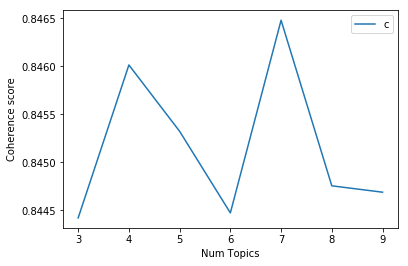

Num Topics = 3  has Coherence Value of 0.8444
Num Topics = 4  has Coherence Value of 0.846
Num Topics = 5  has Coherence Value of 0.8453
Num Topics = 6  has Coherence Value of 0.8445
Num Topics = 7  has Coherence Value of 0.8465
Num Topics = 8  has Coherence Value of 0.8448
Num Topics = 9  has Coherence Value of 0.8447


In [185]:
# Show graph
limit=10; start=3; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()


# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

In [38]:
# Select the model and print the topics
optimal_model = model_list[6]  #best model
model_topics = optimal_model.show_topics(formatted=False)
pprint.pprint(optimal_model.print_topics(num_words=10))

[(0,
  '0.024*"아깝다/Adjective" + 0.022*"별/Noun" + 0.021*"중독/Noun" + 0.018*"개꿀/Noun" '
  '+ 0.018*"과/Noun" + 0.016*"심심하다/Adjective" + 0.016*"부터/Noun" + '
  '0.015*"돈/Noun" + 0.015*"구매/Noun" + 0.014*"걸/Noun"'),
 (1,
  '0.022*"전/Noun" + 0.021*"귀엽다/Adjective" + 0.018*"대박/Noun" + '
  '0.017*"아쉽다/Adjective" + 0.015*"겜/Noun" + 0.013*"시작/Noun" + 0.013*"버전/Noun" '
  '+ 0.012*"한글/Noun" + 0.012*"레벨/Noun" + 0.012*"와이파이/Noun"'),
 (2,
  '0.030*"어렵다/Adjective" + 0.025*"성/Noun" + 0.021*"안되다/Adjective" + '
  '0.020*"분/Noun" + 0.019*"렉/Noun" + 0.017*"친구/Noun" + 0.012*"모바일/Noun" + '
  '0.012*"너/Noun" + 0.012*"보고/Noun" + 0.011*"무섭다/Adjective"'),
 (3,
  '0.026*"돈/Noun" + 0.022*"줄/Noun" + 0.020*"맵/Noun" + 0.020*"좋아하다/Adjective" + '
  '0.016*"꼭/Noun" + 0.015*"무료/Noun" + 0.014*"캐릭터/Noun" + 0.013*"다운로드/Noun" + '
  '0.013*"버그/Noun" + 0.011*"머리/Noun"'),
 (4,
  '0.025*"제작자/Noun" + 0.022*"처음/Noun" + 0.021*"환불/Noun" + 0.020*"추천/Noun" + '
  '0.014*"영어/Noun" + 0.012*"판/Noun" + 0.011*"포우/Noun" + 0.010*"결제/Noun" + '
  '

In [44]:
def format_topics_sentences(ldamodel=lda_model, corpus=tf_ko, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), name_list[int(topic_num)], round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Document_name', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=tf_ko, texts=data)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Document_Name', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

,Document_No,Document_Name,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,1.0,Angry Birds Rio,0.2157,"전/Noun, 귀엽다/Adjective, 대박/Noun, 아쉽다/Adjective,...",[ 재밌고 즐겁습니다. 꿀 잼 매우 좋음 광고 없는 유료화를 해 주세요....
1,1,4.0,Draughts,0.2157,"제작자/Noun, 처음/Noun, 환불/Noun, 추천/Noun, 영어/Noun, ...",[ 와 너무 추억인데 게임이 변한 게 없어서 진짜 좋았다 중독성 재미이는 디...
2,2,3.0,Bubble Shooter,0.2070,"돈/Noun, 줄/Noun, 맵/Noun, 좋아하다/Adjective, 꼭/Noun...",[ 짱! 킬링타임용으로 좋음 Good 그럭저럭합니다 중독성이 강하네요...
3,3,4.0,Draughts,0.2157,"제작자/Noun, 처음/Noun, 환불/Noun, 추천/Noun, 영어/Noun, ...",[ 할 거 없을 때마다 하면 좋아요!:D 제가 단계를 다 깼는데 업데이트는 언제 되...
4,4,0.0,Angry Birds Classic,0.2113,"아깝다/Adjective, 별/Noun, 중독/Noun, 개꿀/Noun, 과/Nou...",[ 이겨서 좋다 영국 친구가 소개해줬어요. 진짜 재밌네요.]
5,5,4.0,Draughts,0.2157,"제작자/Noun, 처음/Noun, 환불/Noun, 추천/Noun, 영어/Noun, ...",[ 그러니 진짜 너무 재밌고 심심할 때 항상 하고 있는 게임이에요!! 한 가지 피드...
6,6,4.0,Draughts,0.2157,"제작자/Noun, 처음/Noun, 환불/Noun, 추천/Noun, 영어/Noun, ...",[ 꾸준한 업데이트 감사합니다. 차에 브레이크 등이 들어왔으면 좋을 거 같고 차량의...
7,7,0.0,Angry Birds Classic,0.2092,"아깝다/Adjective, 별/Noun, 중독/Noun, 개꿀/Noun, 과/Nou...",[ 이 게임 1년 만인데도 아직 옛날과 똑같네요 ㅎㅎ 진짜 재미있고 꿀만 잠 대...
8,8,4.0,Draughts,0.2157,"제작자/Noun, 처음/Noun, 환불/Noun, 추천/Noun, 영어/Noun, ...",[ 이거 PC에서는 화분 2500원인데 왜 5000원이죠? 돈 낭비가 되네요 그리고...
9,9,4.0,Draughts,0.2157,"제작자/Noun, 처음/Noun, 환불/Noun, 추천/Noun, 영어/Noun, ...",[ 굿~!! 재미있는 놀이였습니다. 200이 끝?? 아쉬워요 300까지 추가...


In [ ]:
bow = tfidf_model_ko[dictionary_ko.doc2bow(texts_ko[0])]
sorted(lsi_ko[bow], key=lambda x: x[1], reverse=True)
sorted(lda_ko[bow], key=lambda x: x[1], reverse=True)
sorted(hdp_ko[bow], key=lambda x: x[1], reverse=True)

In [ ]:
bow = tfidf_model_ko[dictionary_ko.doc2bow(texts_ko[1])]
sorted(lsi_ko[bow], key=lambda x: x[1], reverse=True)
sorted(lda_ko[bow], key=lambda x: x[1], reverse=True)
sorted(hdp_ko[bow], key=lambda x: x[1], reverse=True)

In [ ]:
ko = nltk.Text(result, name='token_ko')   
print(len(set(ko.tokens)))  # returns number of unique tokens
ko.vocab()                  # returns frequency distribution

from konlpy.tag import Twitter; t = Twitter()

pos = lambda d: ['/'.join(p) for p in t.pos(d, stem=True, norm=True)]
texts_ko = [pos(doc) for doc in ko]


#create id2word
from gensim import corpora
dictionary_ko = corpora.Dictionary(texts_ko)
#dictionary_ko.save(u'ko.dict')  # save dictionary to file for future use

from gensim import models
tf_ko = [dictionary_ko.doc2bow(text) for text in texts_ko]
tfidf_model_ko = models.TfidfModel(tf_ko)
tfidf_ko = tfidf_model_ko[tf_ko]
#corpora.MmCorpus.serialize('ko.mm', tfidf_ko) # save corpus to file for future use


import numpy as np; np.random.seed(42)  # optional
import pprint

ntopics = 5
nwords = 5

lda_ko = models.ldamodel.LdaModel(tfidf_ko, id2word=dictionary_ko, num_topics=ntopics)
pprint.pprint(lda_ko.print_topics(num_topics=ntopics, num_words=nwords))

from gensim.models import word2vec
wv_model_ko = word2vec.Word2Vec(texts_ko)
wv_model_ko.init_sims(replace=True)
#wv_model_ko.save('ko_word2vec.model')



import gensim

lda_model = gensim.models.ldamodel.LdaModel(corpus=tf_ko,
id2word=dictionary_ko,
num_topics=5,
random_state=100,
update_every=1,
chunksize=100,
passes=10,
alpha='auto',
per_word_topics=True)

doc_lda = lda_model[tf_ko]
print(doc_lda)
import pprint

pprint.pprint(lda_model.print_topics())


######
mallet_path = 'mallet-2.0.8/bin/mallet' # update this path
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=tf_ko, num_topics=7, id2word=dictionary_ko)
pprint.pprint(ldamallet.show_topics(formatted=False))
